<a href="https://colab.research.google.com/github/BryanSouza91/COVID-19/blob/master/COVID-19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This is only the tested and reported cases John Hopkins CCSE has data for this is by no means a definitive view of the global epidemic.

##### The repo is updated daily around 5:00pm PDT

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import matplotlib.dates as mdates
from datetime import datetime, date, timedelta

In [56]:
confirmed_url = "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

recovered_url = "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"

deaths_url = "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

In [57]:
conf_df = pd.read_csv(confirmed_url) # ,index_col=['Province/State', 'Country/Region', 'Lat', 'Long']) 

recv_df = pd.read_csv(recovered_url) # ,index_col=['Province/State', 'Country/Region', 'Lat', 'Long'])

death_df = pd.read_csv(deaths_url) # ,index_col=['Province/State', 'Country/Region', 'Lat', 'Long'])

In [58]:
latest = conf_df.columns[-1]
latest

'7/8/20'

In [59]:
dates = conf_df.loc[:,'1/22/20':].columns

In [60]:
# create a differenced series function

def difference(dataset, interval=1):
    return pd.Series([dataset[i] - dataset[i - interval] for i in range(interval, len(dataset))])


# Plots total confirmed cases by country

##### Changing the logx=False to True shows the logarithmic scales of x-axis
##### Changing the logy=False to True shows the logarithmic scales of y-axis
##### Changing the loglog=False to True shows the logarithmic scales of both axes

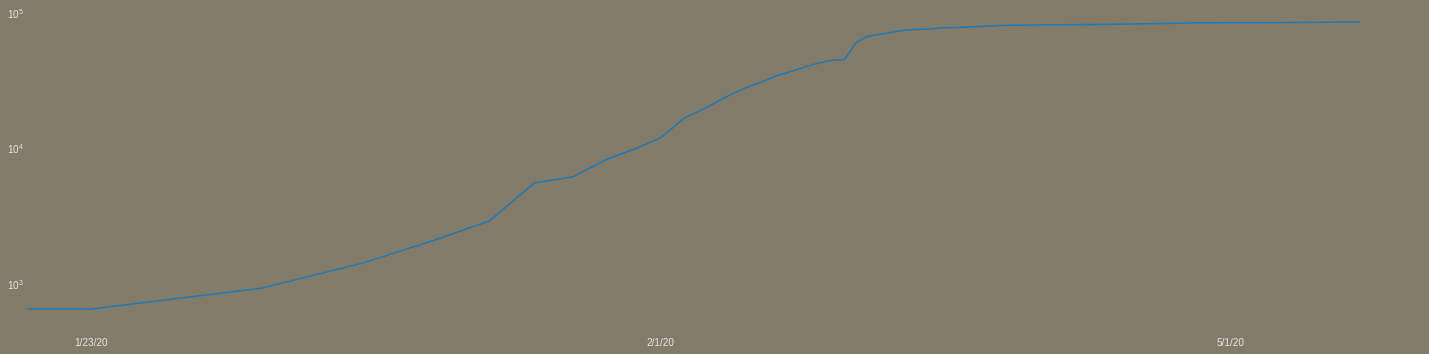

In [61]:
conf_df.loc[:,'1/22/20':].loc[conf_df['Country/Region'] == 'China'].sum().plot(figsize=(25,6),logx=False,logy=False,loglog=True);

In [8]:
# plt.figure(figsize=(26,13))
# plt.title("SARS-Cov-2 COVID-19 Confirmed Cases")
# sns.set_palette('colorblind')
# sns.scatterplot(x='Long',y='Lat',size=latest,hue='Country/Region',data=conf_df,sizes=(10,10000),legend=False,edgecolor='k');

In [9]:
# plt.figure(figsize=(26,13))
# plt.title("SARS-Cov-2 COVID-19 Recovered Cases")
# sns.set_palette('colorblind')
# sns.scatterplot(x='Long',y='Lat',size=latest,hue='Country/Region',data=recv_df,sizes=(10,10000),legend=False,edgecolor='k');

In [10]:
# plt.figure(figsize=(26,13))
# plt.title("SARS-Cov-2 COVID-19 Deaths")
# sns.set_palette('colorblind')
# sns.scatterplot(x='Long',y='Lat',size=latest,hue='Country/Region',data=death_df,sizes=(10,10000),legend=False,edgecolor='k');

In [11]:
# plt.figure(figsize=(26,13))
# plt.title("SARS-Cov-2 COVID-19 World Confirmed Cases")
# sns.set_palette('colorblind')
# ax = sns.stripplot(data=conf_df);
# ax.set_xticks(np.arange(0, max(len(dates), 14)));
# ax.set_xticklabels(pd.date_range(min(dates), max(dates),freq="14D"));

In [12]:
# plt.figure(figsize=(26,13))
# plt.title("SARS-Cov-2 COVID-19 World Deaths")
# sns.set_palette('colorblind')
# sns.stripplot(data=death_df);

In [13]:
# plt.figure(figsize=(26,13))
# plt.title("SARS-Cov-2 COVID-19 World Recovered Cases")
# sns.set_palette('colorblind')
# sns.stripplot(data=recv_df);

In [14]:
conf_df.loc[::,"1/22/20"::]

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20
0,0,0,0,0,0,0,0,0,0,0,...,30616,30967,31238,31517,31836,32022,32324,32672,32951,33190
1,0,0,0,0,0,0,0,0,0,0,...,2330,2402,2466,2535,2580,2662,2752,2819,2893,2964
2,0,0,0,0,0,0,0,0,0,0,...,12968,13273,13571,13907,14272,14657,15070,15500,15941,16404
3,0,0,0,0,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,855
4,0,0,0,0,0,0,0,0,0,0,...,259,267,276,284,291,315,328,346,346,346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0,0,0,0,0,0,0,0,0,0,...,713,713,713,714,715,717,719,719,720,721
262,0,0,0,0,0,0,0,0,0,0,...,1103,1118,1128,1158,1190,1221,1240,1248,1265,1284
263,0,0,0,0,0,0,0,0,0,0,...,272,272,272,303,303,303,309,309,311,311
264,0,0,0,0,0,0,0,0,0,0,...,5799,5849,5900,5900,6005,6058,6058,6159,6213,6262


# Daily Reporting CSVs

In [7]:
def toStrftime(t):
    return t.strftime('%x').replace('/','-')


def getGroup(df, group, locale):
    grouped_df = df.groupby(group)
    return grouped_df.get_group(locale)

In [187]:
latest = (date.today() - timedelta(days=1))
latest = toStrftime(latest)
print(latest)

07-07-20


In [188]:
startDate = '04/12/20'

dateList = pd.date_range(startDate, latest, freq='d')
dateList = list(map(toStrftime,dateList))

# print(dateList)
print(len(dateList))

87


In [189]:
url_="https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_daily_reports_us/"

In [9]:
def daily(date, group, locale):
    df = pd.read_csv(url_+date+"20.csv")
    return getGroup(df, group, locale)

In [191]:
fullDf = pd.concat(map(daily, dateList, ['Province_State'] * len(dateList), ['California'] * len(dateList)))

In [192]:
fullDf.tail()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
5,California,US,2020-07-04 04:34:04,36.1162,-119.6816,250514,6315,NaN,244199.0,6.0,634.016466,4448176.0,NaN,2.520817,84000006.0,USA,11257.721440,NaN
5,California,US,2020-07-05 04:34:00,36.1162,-119.6816,252895,6334,NaN,246561.0,6.0,640.042450,4553031.0,NaN,2.504597,84000006.0,USA,11523.095018,NaN
5,California,US,2020-07-06 04:34:10,36.1162,-119.6816,264681,6373,NaN,258308.0,6.0,669.871194,4680138.0,NaN,2.407804,84000006.0,USA,11844.785347,NaN
5,California,US,2020-07-07 04:34:13,36.1162,-119.6816,271035,6441,NaN,264594.0,6.0,685.952294,4793353.0,NaN,2.376446,84000006.0,USA,12131.316935,NaN
5,California,US,2020-07-08 05:34:00,36.1162,-119.6816,284012,6573,NaN,277439.0,6.0,718.795295,4896370.0,NaN,2.314339,84000006.0,USA,12392.038788,NaN


In [24]:
fullDf.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')

In [25]:
# plt.figure(figsize=(26,13))
# plt.title("SARS-Cov-2 COVID-19 California")
# sns.set_palette('colorblind')
# sns.lineplot(x="Last_Update", y="Incident_Rate", data=fullDf);
# sns.lineplot(x="Last_Update", y="Testing_Rate", data=fullDf);

In [194]:
# plt.figure(figsize=(26,13))
# plt.title("SARS-Cov-2 COVID-19 California")
# sns.set_palette('colorblind')
# sns.lineplot(x="Last_Update", y="Confirmed", data=fullDf);
# sns.lineplot(x="Last_Update", y="Deaths", data=fullDf);
# sns.lineplot(x="Last_Update", y="Active", data=fullDf);

In [27]:
# fullDf7 = pd.DataFrame(fullDf.rolling(7).mean())

In [28]:
# days = list(range(len(fullDf7)))
# yVar = "Confirmed"
# plt.figure(figsize=(26,13))
# plt.title(f"SARS-Cov-2 COVID-19 California {yVar}")
# sns.set_palette('colorblind')
# sns.barplot(x=days, y=yVar, data=fullDf);
# sns.lineplot(x=days, y=yVar, data=fullDf7);

# World report

In [76]:
# Create reusable series objects 
conf_sum = conf_df.loc[:,'1/22/20':].sum()
recv_sum = recv_df.loc[:,'1/22/20':].sum()
death_sum = death_df.loc[:,'1/22/20':].sum()

conf_sum_dif = difference(conf_sum)
recv_sum_dif = difference(recv_sum)
death_sum_dif = difference(death_sum)

dates = conf_df.loc[:,'1/23/20':].columns.values
last_col = conf_df.columns[-1].replace('/','-')
last_col

'7-8-20'

In [63]:
colors = [
    '#08F7FE',  # teal/cyan
    '#FE53BB',  # pink
    '#F5D300',  # yellow
    '#00ff41', # matrix green
    '#827b69', # grey
    '#ab0047', # magenta
]


diff_linewidth = 10.05
alpha_value = 0.3

In [78]:
dates = ['0' + date + '20' for date in dates]

In [79]:
dates = [datetime.strptime(date, '%m/%d/%Y') for date in dates]

In [80]:
dates[57]

datetime.datetime(2020, 3, 20, 0, 0)

World numbers current as of 7/8/20

New cases:                                          211878 | 1.760%
Total confirmed cases:                              12041480
New case 7- | 30- | 60-day Moving Average:          196759 | 164802 | 133632
New recovered cases:                                157951 | 1.312%
Total recovered:                                    6605607 | 54.857%
Recovered 7- | 30- | 60-day Moving Average:         162353 | 110407 | 87245
New Deaths:                                         5305 | 0.044%
Total deaths:                                       549468 | 4.563%
Death 7- | 30- | 60-day Moving Average:             4745 | 4739 | 4482
Total Resolved Cases:                               7155075 | 59.420%
Deaths as percentage of Total Resolved:             7.679%

Growth rate above 1.0 is sign of exponential growth,
but also skewed by increased testing.
World Growth rate:                                  1.011



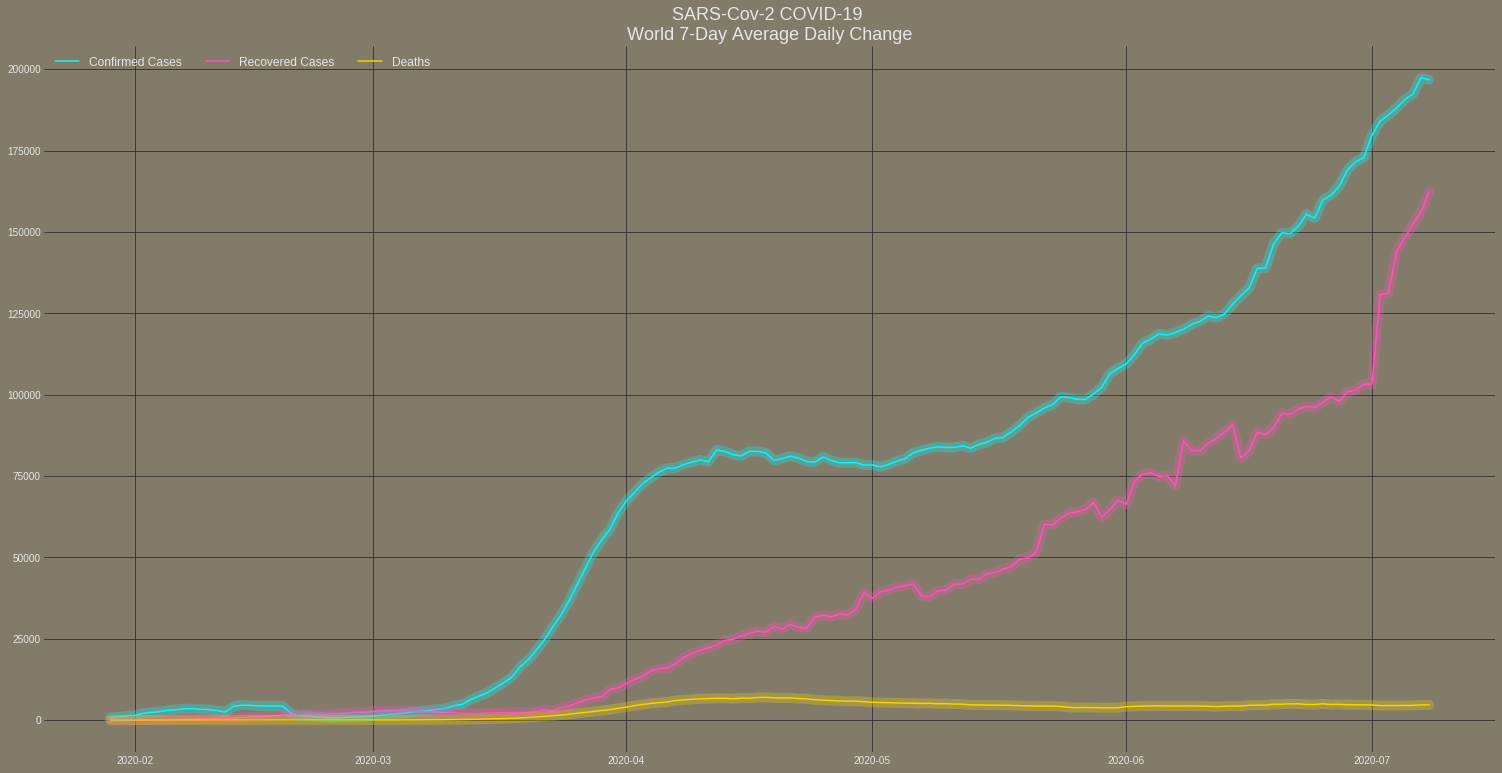

In [160]:
# Print world report
print("World numbers current as of {}".format(conf_df.columns[-1]))
print()
print("New cases:                                          {0} | {1:.3%}".format(conf_sum_dif.values[-1],conf_sum_dif.values[-1]/conf_sum.values[-1]))
print("Total confirmed cases:                              {0}".format(conf_sum[-1]))
print("New case 7- | 30- | 60-day Moving Average:          {0:.0f} | {1:.0f} | {2:.0f}".format(difference(conf_sum, 1).rolling(7).mean().values[-1],difference(conf_sum, 1).rolling(30).mean().values[-1],difference(conf_sum, 1).rolling(60).mean().values[-1]))
print("New recovered cases:                                {0} | {1:.3%}".format(recv_sum_dif.values[-1],recv_sum_dif.values[-1]/conf_sum.values[-1]))
print("Total recovered:                                    {0} | {1:.3%}".format(recv_sum[-1],recv_sum[-1]/conf_sum[-1]))
print("Recovered 7- | 30- | 60-day Moving Average:         {0:.0f} | {1:.0f} | {2:.0f}".format(difference(recv_sum, 1).rolling(7).mean().values[-1],difference(recv_sum, 1).rolling(30).mean().values[-1],difference(recv_sum, 1).rolling(60).mean().values[-1]))
print("New Deaths:                                         {0} | {1:.3%}".format(death_sum_dif.values[-1],death_sum_dif.values[-1]/conf_sum.values[-1]))
print("Total deaths:                                       {0} | {1:.3%}".format(death_sum[-1],death_sum[-1]/conf_sum[-1]))
print("Death 7- | 30- | 60-day Moving Average:             {0:.0f} | {1:.0f} | {2:.0f}".format(difference(death_sum, 1).rolling(7).mean().values[-1],difference(death_sum, 1).rolling(30).mean().values[-1],difference(death_sum, 1).rolling(60).mean().values[-1]))
print("Total Resolved Cases:                               {0} | {1:.3%}".format((recv_sum[-1] + death_sum[-1]),((recv_sum[-1] + death_sum[-1])/conf_sum[-1])))
print("Deaths as percentage of Total Resolved:             {0:.3%}".format((death_sum[-1]/(recv_sum[-1] + death_sum[-1]))))
print()
print("Growth rate above 1.0 is sign of exponential growth,")
print("but also skewed by increased testing.")
print("World Growth rate:                                  {0:.4}".format((conf_sum_dif.values[-1])/(conf_sum_dif.values[-2])))
print()
fig = plt.figure(figsize=(26,13))
ax = fig.add_subplot(1,1,1)
plt.style.use("seaborn-dark")
for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = colors[4]
for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'
ax.grid(color='#2e2e2e')
plt.title("SARS-Cov-2 COVID-19 \nWorld 7-Day Average Daily Change", fontsize=18)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
# plt.annotate('Test Point\n02/22/2020',xy=(dates[30],3000),arrowprops=dict(arrowstyle='-',connectionstyle='angle,angleA=0,angleB=90'),xytext=(dates[30],20000))
ax.plot(dates, 
        conf_sum_dif.rolling(7).mean(), 
        color=colors[0],
        label='Confirmed Cases'
       );
ax.plot(dates, 
        recv_sum_dif.rolling(7).mean(), 
        color=colors[1],
        label='Recovered Cases'
       );
ax.plot(dates, 
        death_sum_dif.rolling(7).mean(), 
        color=colors[2],
        label='Deaths'
       );
ax.plot(dates, 
        conf_sum_dif.rolling(7).mean(), 
        color=colors[0],
        lw=(diff_linewidth),
        alpha=alpha_value
       );
ax.plot(dates, 
        recv_sum_dif.rolling(7).mean(), 
        color=colors[1],
        lw=(diff_linewidth),
        alpha=alpha_value
       );
ax.plot(dates, 
        death_sum_dif.rolling(7).mean(), 
        color=colors[2],
        lw=(diff_linewidth),
        alpha=alpha_value
       );
ax.legend(ncol=3, loc='upper left', fontsize=12);
fig.savefig(f'world_{last_col}20.png')

# Report for each country reporting cases


In [166]:
# define report function
def report(country):

    # Create reusable series objects 
    country_conf_sum = conf_df.loc[:,'1/22/20':].loc[conf_df['Country/Region'] == country].sum()
    country_recv_sum = recv_df.loc[:,'1/22/20':].loc[recv_df['Country/Region'] == country].sum()
    country_death_sum = death_df.loc[:,'1/22/20':].loc[conf_df['Country/Region'] == country].sum()
    
    dates = conf_df.loc[:,'1/22/20':].columns.values
    dates = ['0' + date + '20' for date in dates]
    dates = [datetime.strptime(date, '%m/%d/%Y') for date in dates][1:]

    country_conf_sum_dif = difference(country_conf_sum).values
    country_recv_sum_dif = difference(country_recv_sum).values
    country_death_sum_dif = difference(country_death_sum).values

    print()
    print('_'*80)
    print("Numbers for {} current as of {}".format(country, country_conf_sum.index[-1]))
    print()
    print("New cases:                                          {0} | {1:.3%}".format(country_conf_sum_dif[-1],country_conf_sum_dif[-1]/country_conf_sum[-1]))
    print("Total confirmed cases:                              {0}".format(country_conf_sum[-1]))
    print("New case 7- | 30- | 60-day Moving Average:          {0:.0f} | {1:.0f} | {2:.0f}".format(difference(country_conf_sum, 1).rolling(7).mean().values[-1],difference(country_conf_sum, 1).rolling(30).mean().values[-1],difference(country_conf_sum, 1).rolling(60).mean().values[-1]))
    print("New recovered cases:                                {0} | {1:.3%}".format(country_recv_sum_dif[-1],(country_recv_sum_dif[-1]/country_conf_sum[-1])))
    print("Total recovered cases:                              {0} | {1:.3%}".format(country_recv_sum[-1],(country_recv_sum[-1]/country_conf_sum[-1])))
    print("New recovered 7- | 30- | 60-day Moving Average:     {0:.0f} | {1:.0f} | {2:.0f}".format(difference(country_recv_sum, 1).rolling(7).mean().values[-1],difference(country_recv_sum, 1).rolling(30).mean().values[-1],difference(country_recv_sum, 1).rolling(60).mean().values[-1]))
    print("New Deaths:                                         {0} | {1:.3%}".format(country_death_sum_dif[-1],country_death_sum_dif[-1]/country_conf_sum[-1]))
    print("Total deaths:                                       {0} | {1:.3%}".format(country_death_sum[-1],(country_death_sum[-1]/country_conf_sum[-1])))
    print("Death 7- | 30- | 60-day Moving Average:             {0:.0f} | {1:.0f} | {2:.0f}".format(difference(country_death_sum, 1).rolling(7).mean().values[-1],difference(country_death_sum, 1).rolling(30).mean().values[-1],difference(country_death_sum, 1).rolling(60).mean().values[-1]))
    print("Total Resolved Cases:                               {0} | {1:.3%}".format((country_recv_sum[-1] + country_death_sum[-1]),((country_recv_sum[-1] + country_death_sum[-1])/country_conf_sum[-1])))
    print("Deaths as percentage of Total Resolved:             {0:.3%}".format((country_death_sum[-1]/(country_recv_sum[-1] +
    country_death_sum[-1]))))
    print()
    print()
    print("Growth rate:                                        {0:.4}".format(country_conf_sum_dif[-1]/country_conf_sum_dif[-2]))
    print("_"*80)
    fig_ = plt.figure(figsize=(20,12))
    fig_.suptitle(f"SARS-Cov-2 COVID-19 \n{country} data as of {toStrftime(dates[-1])}20", fontsize=20)
    ax1 = plt.subplot(2,1,1)
    plt.style.use("seaborn-dark")
    for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
        plt.rcParams[param] = colors[4]
    for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
        plt.rcParams[param] = '0.9'
    ax1.grid(color='#2e2e2e')
    ax1.set_title(f'7-Day Average Daily Change for the {country}', fontsize=14)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    ax1.plot(dates, 
             difference(country_conf_sum).rolling(7).mean(), 
            color=colors[0],
             label='Confirmed Cases'
            );
    ax1.plot(dates, 
             difference(country_recv_sum).rolling(7).mean(), 
            color=colors[1],
             label='Recovered Cases'
            );
    ax1.plot(dates, 
             difference(country_death_sum).rolling(7).mean(), 
            color=colors[2],
             label='Deaths'
            );
    ax1.plot(dates, 
            difference(country_conf_sum).rolling(7).mean(), 
            color=colors[0],
            lw=(diff_linewidth),
            alpha=alpha_value
           );
    ax1.plot(dates, 
            difference(country_recv_sum).rolling(7).mean(), 
            color=colors[1],
            lw=(diff_linewidth),
            alpha=alpha_value
           );
    ax1.plot(dates, 
            difference(country_death_sum).rolling(7).mean(), 
            color=colors[2],
            lw=(diff_linewidth),
            alpha=alpha_value
           );
    ax1.legend(ncol=3, loc='upper left', fontsize=12);
    ax2 = plt.subplot(2,1,2)
    ax2.grid(color='#2e2e2e')
    ax2.set_title(f'Total Cases for the {country}', fontsize=14)
#     dates = list(map(datetime, country_conf_sum.index))
    dates = ['0' + date + '20' for date in country_conf_sum.index]
    dates = [datetime.strptime(date, '%m/%d/%Y') for date in dates]
    ax2.plot(dates, 
            country_conf_sum, 
            color=colors[0],
            );
    ax2.plot(dates, 
            country_recv_sum, 
            color=colors[1],
            );
    ax2.plot(dates, 
            country_death_sum, 
            color=colors[2],
            );
    ax2.plot(dates, 
            country_conf_sum, 
            color=colors[0],
            lw=(diff_linewidth),
            alpha=alpha_value
           );
    ax2.plot(dates, 
            country_recv_sum, 
            color=colors[1],
            lw=(diff_linewidth),
            alpha=alpha_value
           );
    ax2.plot(dates, 
            country_death_sum, 
            color=colors[2],
            lw=(diff_linewidth),
            alpha=alpha_value
           );
    fig_.savefig(f'{country}_{toStrftime(dates[-1])}20.png')


________________________________________________________________________________
Numbers for US current as of 7/8/20

New cases:                                          58601 | 1.918%
Total confirmed cases:                              3054699
New case 7- | 30- | 60-day Moving Average:          52444 | 36431 | 29006
New recovered cases:                                16986 | 0.556%
Total recovered cases:                              953462 | 31.213%
New recovered 7- | 30- | 60-day Moving Average:     31924 | 14498 | 12349
New Deaths:                                         820 | 0.027%
Total deaths:                                       132300 | 4.331%
Death 7- | 30- | 60-day Moving Average:             599 | 684 | 872
Total Resolved Cases:                               1085762 | 35.544%
Deaths as percentage of Total Resolved:             12.185%


Growth rate:                                        0.9763
______________________________________________________________________________

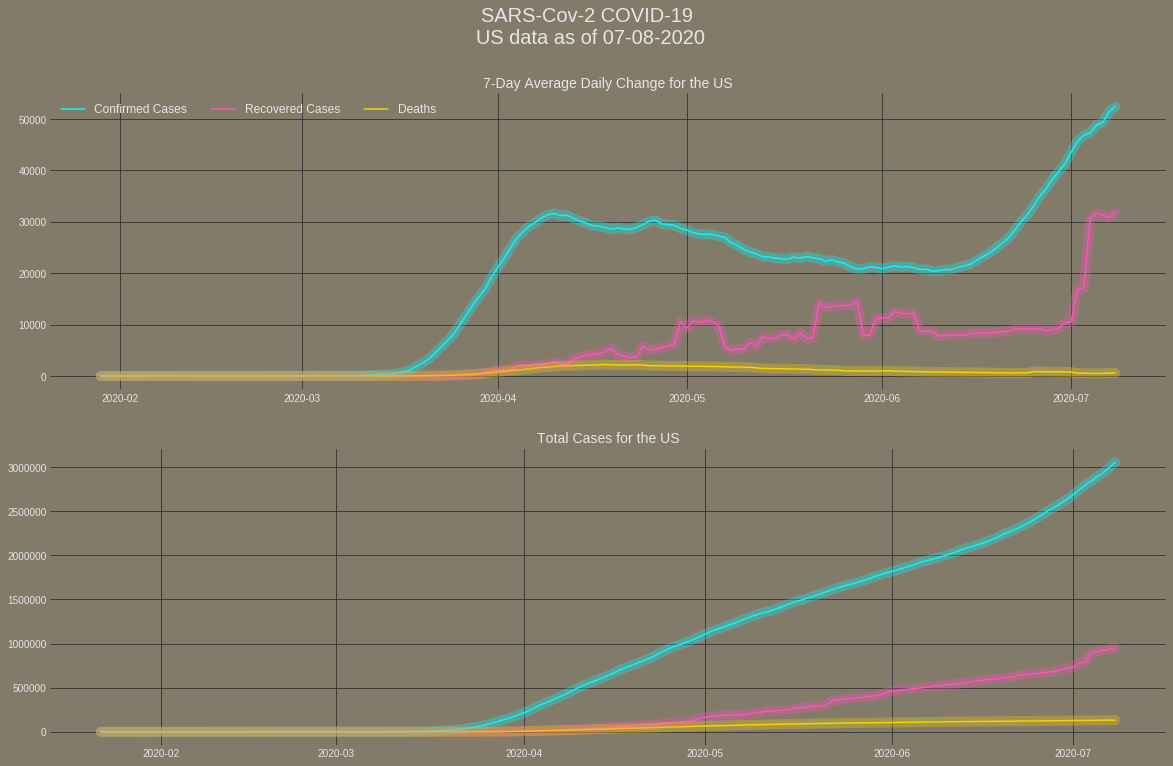

In [167]:
report('US')


________________________________________________________________________________
Numbers for New Zealand current as of 7/8/20

New cases:                                          3 | 0.195%
Total confirmed cases:                              1540
New case 7- | 30- | 60-day Moving Average:          1 | 1 | 1
New recovered cases:                                2 | 0.130%
Total recovered cases:                              1494 | 97.013%
New recovered 7- | 30- | 60-day Moving Average:     1 | 0 | 2
New Deaths:                                         0 | 0.000%
Total deaths:                                       22 | 1.429%
Death 7- | 30- | 60-day Moving Average:             0 | 0 | 0
Total Resolved Cases:                               1516 | 98.442%
Deaths as percentage of Total Resolved:             1.451%


Growth rate:                                        3.0
________________________________________________________________________________


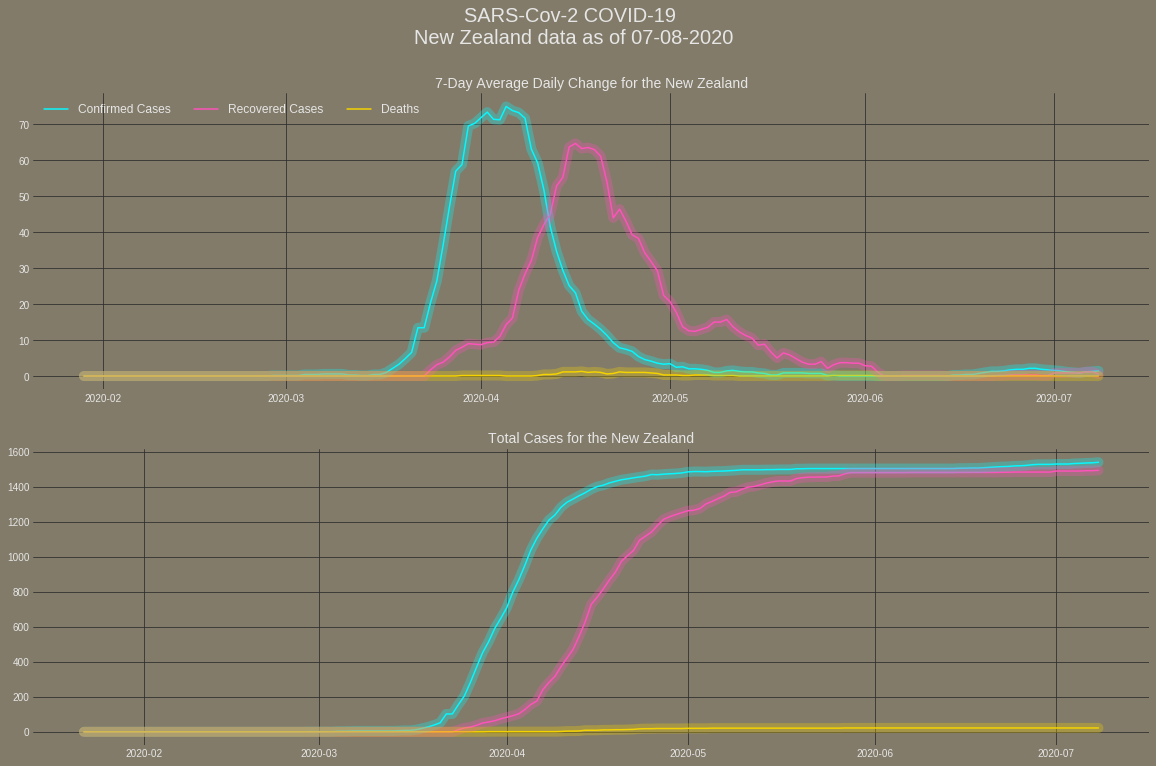

In [168]:
report('New Zealand')


________________________________________________________________________________
Numbers for Italy current as of 7/8/20

New cases:                                          193 | 0.080%
Total confirmed cases:                              242149
New case 7- | 30- | 60-day Moving Average:          198 | 229 | 398
New recovered cases:                                825 | 0.341%
Total recovered cases:                              193640 | 79.967%
New recovered 7- | 30- | 60-day Moving Average:     418 | 902 | 1510
New Deaths:                                         15 | 0.006%
Total deaths:                                       34914 | 14.418%
Death 7- | 30- | 60-day Moving Average:             18 | 32 | 75
Total Resolved Cases:                               228554 | 94.386%
Deaths as percentage of Total Resolved:             15.276%


Growth rate:                                        1.409
________________________________________________________________________________


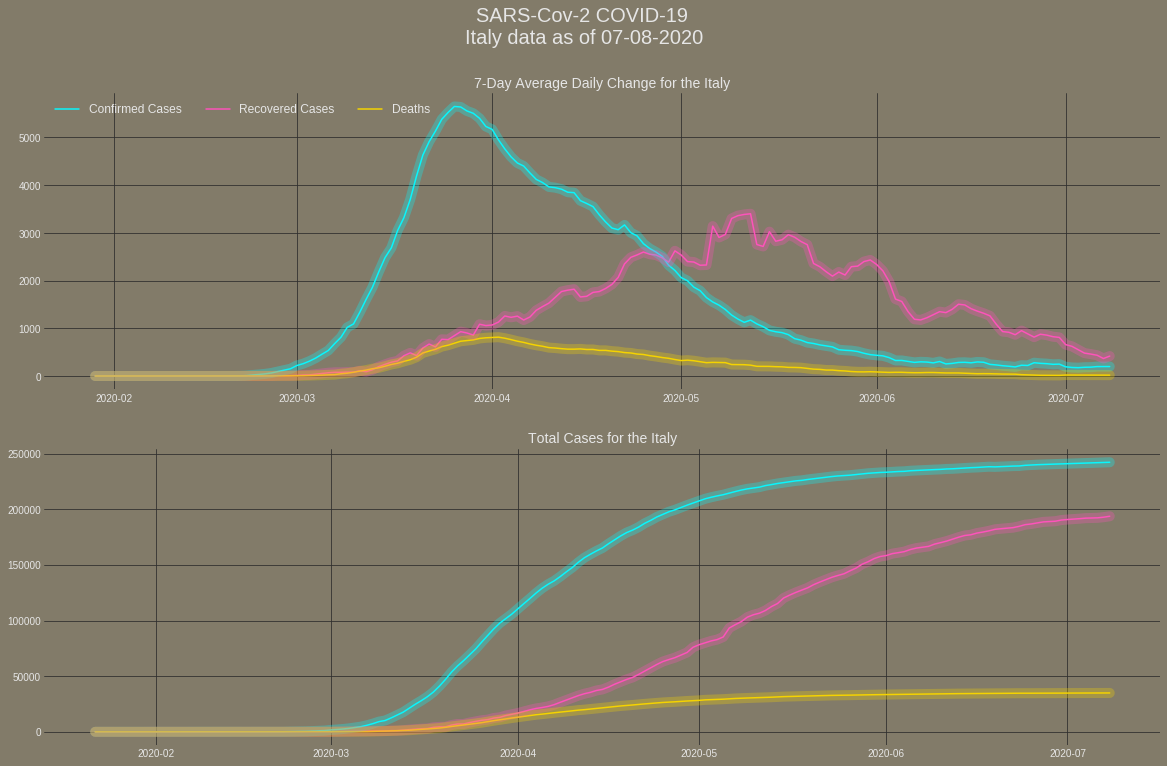

In [169]:
report('Italy')


________________________________________________________________________________
Numbers for United Kingdom current as of 7/8/20

New cases:                                          637 | 0.221%
Total confirmed cases:                              288511
New case 7- | 30- | 60-day Moving Average:          462 | 725 | 1315
New recovered cases:                                3 | 0.001%
Total recovered cases:                              1378 | 0.478%
New recovered 7- | 30- | 60-day Moving Average:     1 | 4 | 6
New Deaths:                                         126 | 0.044%
Total deaths:                                       44602 | 15.459%
Death 7- | 30- | 60-day Moving Average:             87 | 131 | 216
Total Resolved Cases:                               45980 | 15.937%
Deaths as percentage of Total Resolved:             97.003%


Growth rate:                                        1.091
________________________________________________________________________________


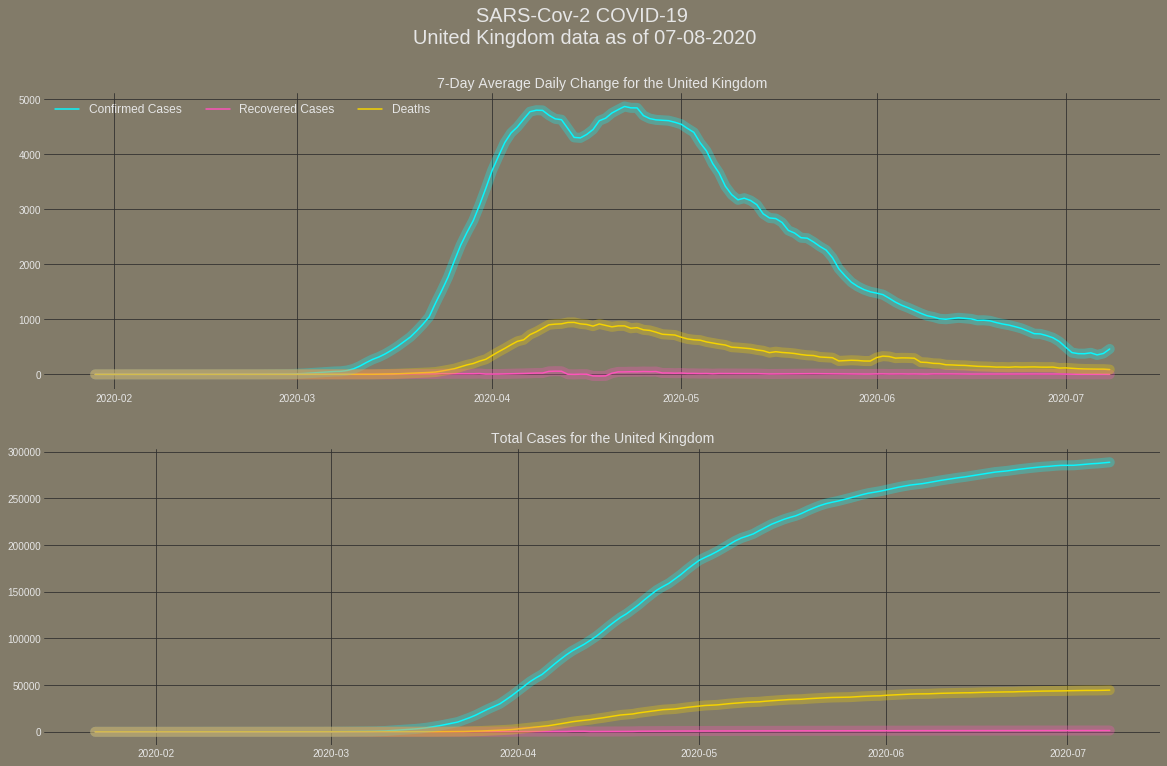

In [170]:
report('United Kingdom')


________________________________________________________________________________
Numbers for Brazil current as of 7/8/20

New cases:                                          44571 | 2.602%
Total confirmed cases:                              1713160
New case 7- | 30- | 60-day Moving Average:          37772 | 33525 | 25952
New recovered cases:                                32832 | 1.916%
Total recovered cases:                              1139844 | 66.535%
New recovered 7- | 30- | 60-day Moving Average:     46029 | 25386 | 17969
New Deaths:                                         1223 | 0.071%
Total deaths:                                       67964 | 3.967%
Death 7- | 30- | 60-day Moving Average:             1047 | 1028 | 955
Total Resolved Cases:                               1207808 | 70.502%
Deaths as percentage of Total Resolved:             5.627%


Growth rate:                                        0.9838
________________________________________________________________________

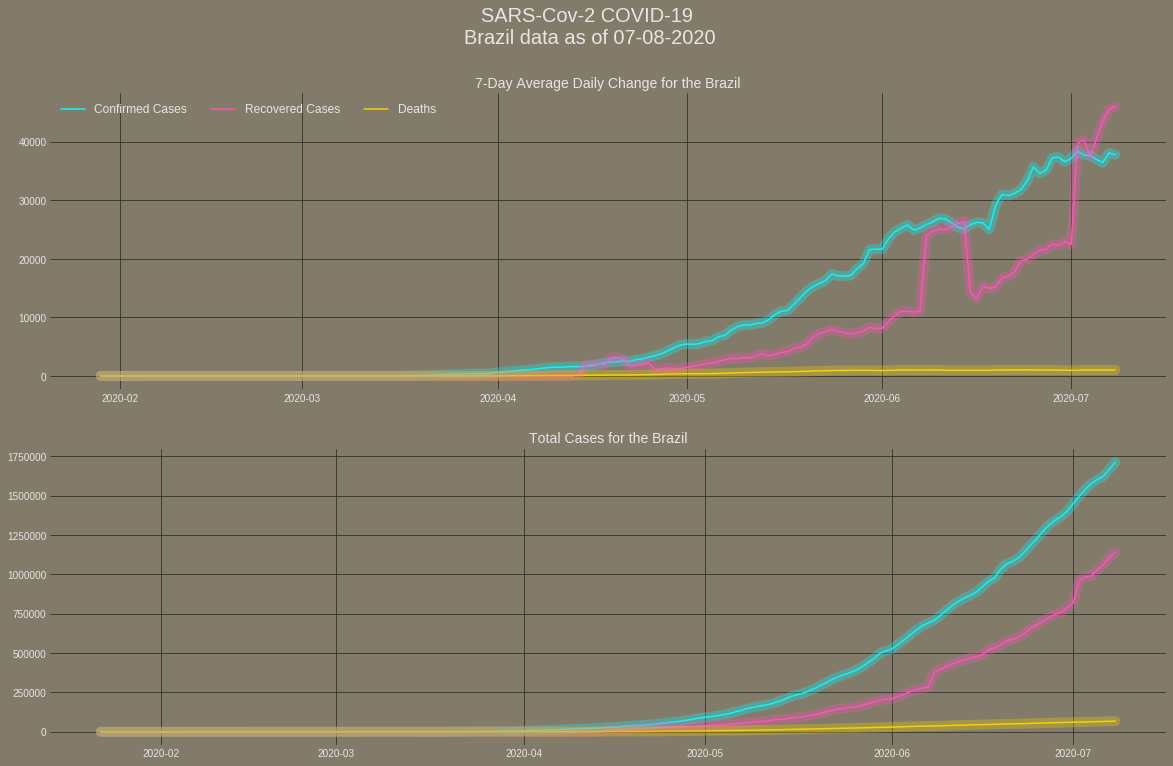

In [171]:
report('Brazil')


________________________________________________________________________________
Numbers for France current as of 7/8/20

New cases:                                          0 | 0.000%
Total confirmed cases:                              206072
New case 7- | 30- | 60-day Moving Average:          442 | 488 | 488
New recovered cases:                                0 | 0.000%
Total recovered cases:                              77780 | 37.744%
New recovered 7- | 30- | 60-day Moving Average:     158 | 220 | 361
New Deaths:                                         0 | 0.000%
Total deaths:                                       29936 | 14.527%
Death 7- | 30- | 60-day Moving Average:             10 | 24 | 60
Total Resolved Cases:                               107716 | 52.271%
Deaths as percentage of Total Resolved:             27.792%


Growth rate:                                        0.0
________________________________________________________________________________


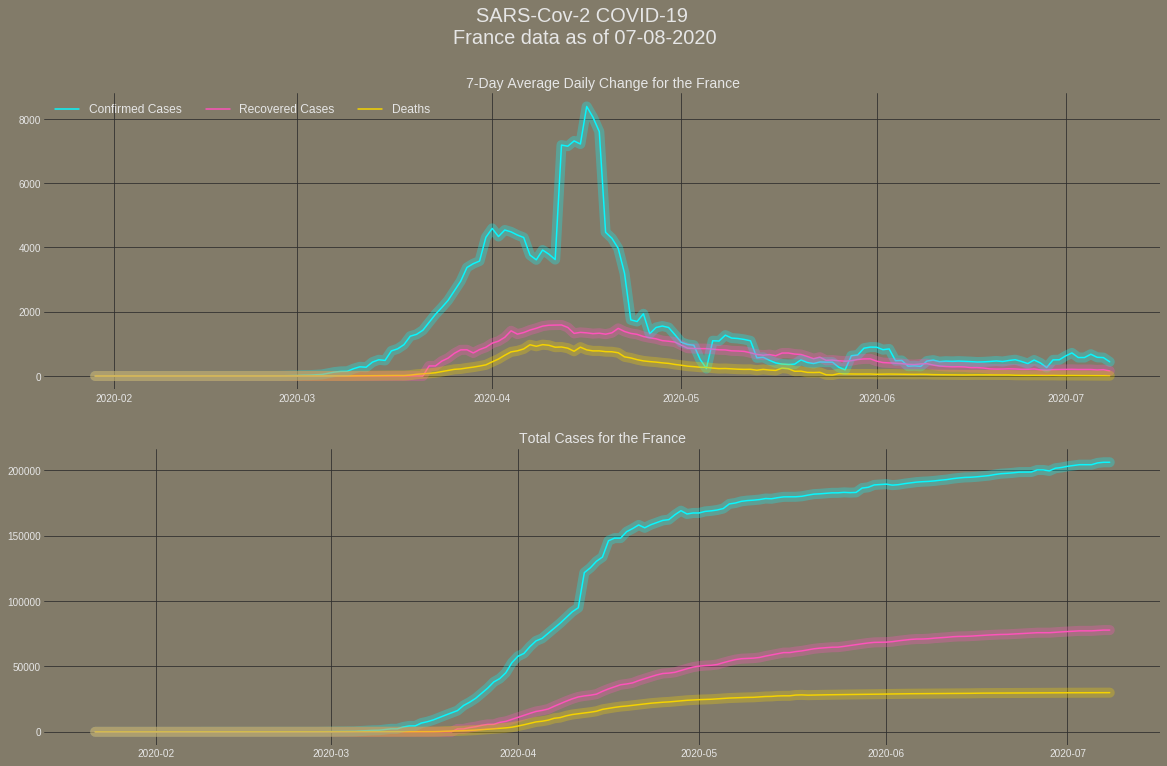

In [172]:
report('France')


________________________________________________________________________________
Numbers for Sweden current as of 7/8/20

New cases:                                          514 | 0.696%
Total confirmed cases:                              73858
New case 7- | 30- | 60-day Moving Average:          595 | 958 | 799
New recovered cases:                                0 | 0.000%
Total recovered cases:                              0 | 0.000%
New recovered 7- | 30- | 60-day Moving Average:     0 | 0 | 0
New Deaths:                                         35 | 0.047%
Total deaths:                                       5482 | 7.422%
Death 7- | 30- | 60-day Moving Average:             16 | 26 | 38
Total Resolved Cases:                               5482 | 7.422%
Deaths as percentage of Total Resolved:             100.000%


Growth rate:                                        1.816
________________________________________________________________________________


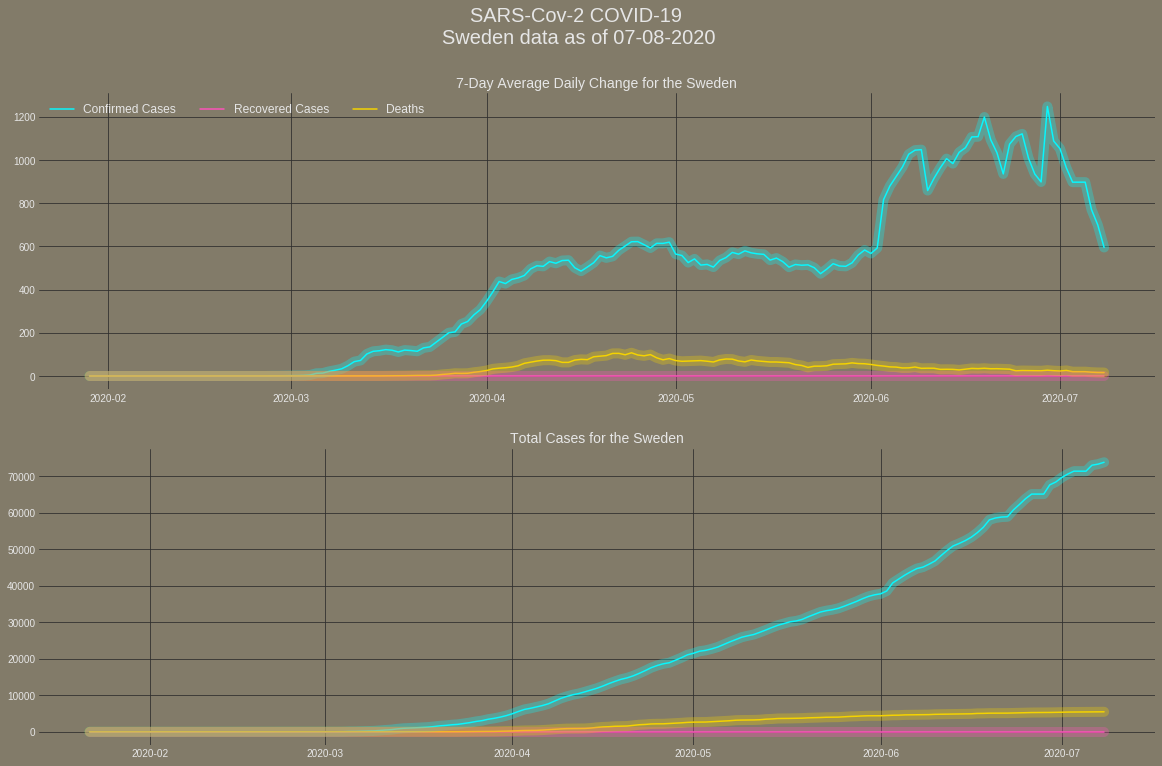

In [173]:
report('Sweden')

In [174]:
# for each in conf_df['Country/Region'].sort_values().unique():
    # report(each)

## Make a graphing function similar to the reporting function.
### Moving Average Graphs
### Death as Percentage graph

In [184]:
window_size = 7

In [203]:
# plt.figure(figsize=(26,13))
# plt.title("SARS-Cov-2 COVID-19 World Daily Change")
# sns.set_palette('colorblind')
# sns.lineplot(data=conf_sum_dif.rolling(window_size).mean());
# sns.lineplot(data=recv_sum_dif.rolling(window_size).mean());
# sns.lineplot(data=death_sum_dif.rolling(window_size).mean());

# Time-Series CSVs Analysis

In [2]:
url_conf = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"
url_death = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv"

In [3]:
conf_ts_df = pd.read_csv(url_conf)
death_ts_df = pd.read_csv(url_death)

In [4]:
conf_ts_df.tail()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20
3256,84070016,US,USA,840,NaN,Central Utah,Utah,US,39.372319,-111.575868,...,159,169,173,180,194,201,209,217,227,234
3257,84070017,US,USA,840,NaN,Southeast Utah,Utah,US,38.996171,-110.701396,...,35,36,37,39,40,40,40,41,41,45
3258,84070018,US,USA,840,NaN,Southwest Utah,Utah,US,37.854472,-111.441876,...,1467,1519,1553,1584,1625,1660,1689,1731,1805,1840
3259,84070019,US,USA,840,NaN,TriCounty,Utah,US,40.124915,-109.517442,...,48,50,50,52,53,55,55,56,56,59
3260,84070020,US,USA,840,NaN,Weber-Morgan,Utah,US,41.271160,-111.914512,...,919,954,1004,1042,1090,1172,1195,1255,1293,1368


In [10]:
calif_conf = pd.DataFrame(getGroup(conf_ts_df, 'Province_State', 'California'))

In [11]:
calif_conf.tail()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20
246,84006111,US,USA,840,6111.0,Ventura,California,US,34.444657,-119.091061,...,2740,2926,3096,3240,3240,3240,3240,3789,3858,3858
247,84006113,US,USA,840,6113.0,Yolo,California,US,38.682789,-121.901829,...,505,505,555,583,583,613,677,677,723,760
248,84006115,US,USA,840,6115.0,Yuba,California,US,39.262559,-121.353564,...,71,71,94,103,103,106,106,128,139,154
3151,84080006,US,USA,840,80006.0,Out of CA,California,US,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3203,84090006,US,USA,840,90006.0,Unassigned,California,US,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [12]:
calif_death = pd.DataFrame(getGroup(death_ts_df, 'Province_State', 'California'))

In [13]:
calif_death.tail()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20
246,84006111,US,USA,840,6111.0,Ventura,California,US,34.444657,-119.091061,...,45,45,46,47,47,47,47,50,50,50
247,84006113,US,USA,840,6113.0,Yolo,California,US,38.682789,-121.901829,...,24,24,24,24,24,25,26,26,26,28
248,84006115,US,USA,840,6115.0,Yuba,California,US,39.262559,-121.353564,...,1,1,1,1,1,1,1,2,2,3
3153,84080006,US,USA,840,80006.0,Out of CA,California,US,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3205,84090006,US,USA,840,90006.0,Unassigned,California,US,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [14]:
sac_conf = pd.DataFrame(getGroup(calif_conf, 'Admin2', 'Sacramento'))

In [15]:
sac_conf

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20
224,84006067,US,USA,840,6067.0,Sacramento,California,US,38.451068,-121.342537,...,3004,3223,3397,3559,3559,4004,4236,4236,4566,4776


In [16]:
sac_death = pd.DataFrame(getGroup(calif_death, 'Admin2', 'Sacramento'))

In [17]:
sac_death

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20
224,84006067,US,USA,840,6067.0,Sacramento,California,US,38.451068,-121.342537,...,68,68,68,69,69,69,69,69,76,78


In [45]:
dates = sac_conf.loc[:,'1/23/20':].columns.values
dates = ['0' + date + '20' for date in dates]
dates = [datetime.strptime(date, '%m/%d/%Y') for date in dates]
len(dates),sac_conf.loc[:,'1/22/20':].squeeze().shape

(168, (169,))

In [28]:
dates[158]

datetime.datetime(2020, 6, 28, 0, 0)

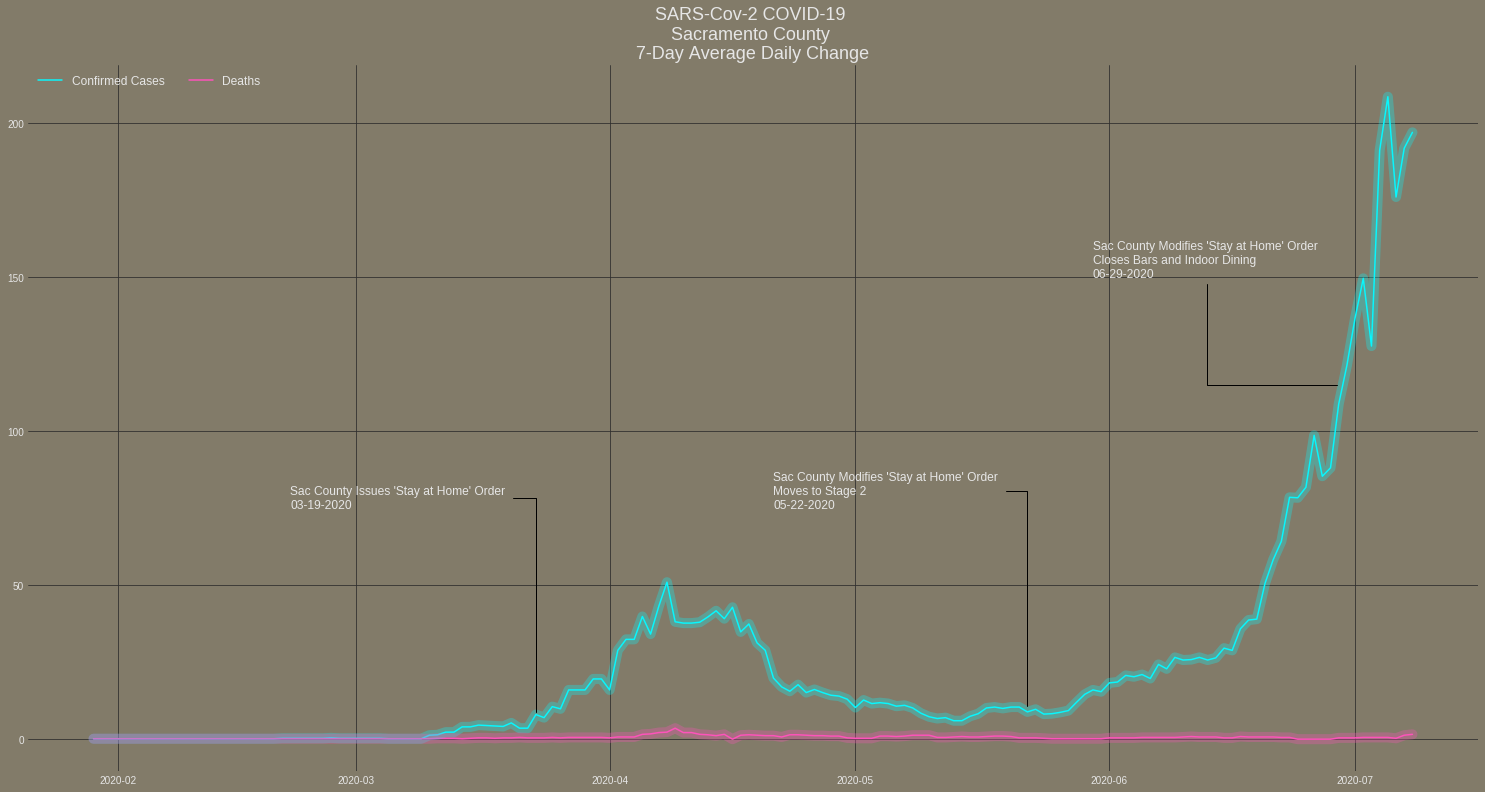

In [46]:
fig = plt.figure(figsize=(26,13))
ax = fig.add_subplot(1,1,1)

plt.style.use("seaborn-dark")
for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = colors[4]
for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'
ax.grid(color='#2e2e2e')
plt.title("SARS-Cov-2 COVID-19 \nSacramento County \n7-Day Average Daily Change",
            fontsize=18) # suptitle
# plt.title('7-Day Moving Average', fontsize=12)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.annotate("Sac County Issues 'Stay at Home' Order \n03-19-2020",xy=(dates[60],8),arrowprops=dict(arrowstyle='-',connectionstyle='angle,angleA=0,angleB=90'),xytext=(dates[30],75), fontsize=12)
plt.annotate("Sac County Modifies 'Stay at Home' Order \nMoves to Stage 2 \n05-22-2020",xy=(dates[120],10),arrowprops=dict(arrowstyle='-',connectionstyle='angle,angleA=0,angleB=90'),xytext=(dates[89],75), fontsize=12)
plt.annotate("Sac County Modifies 'Stay at Home' Order \nCloses Bars and Indoor Dining \n06-29-2020",xy=(dates[158],115),arrowprops=dict(arrowstyle='-',connectionstyle='angle,angleA=90,angleB=0'),xytext=(dates[128],150), fontsize=12)
ax.plot(dates, 
        difference(sac_conf.loc[:,'1/22/20':].squeeze()).rolling(7).mean(), 
        color=colors[0],
        label='Confirmed Cases'
       );
ax.plot(dates, 
        difference(sac_death.loc[:,'1/22/20':].squeeze()).rolling(7).mean(),
        color=colors[1],
        label='Deaths'
       );
ax.plot(dates, 
        difference(sac_conf.loc[:,'1/22/20':].squeeze()).rolling(7).mean(), 
        color=colors[0],
        lw=(diff_linewidth),
        alpha=alpha_value
       );
ax.plot(dates, 
        difference(sac_death.loc[:,'1/22/20':].squeeze()).rolling(7).mean(), 
        color=colors[1],
        lw=(diff_linewidth),
        alpha=alpha_value
       );
ax.legend(fontsize=12, ncol=2, loc='upper left');
fig.savefig('SacCountyDailyChange.png')

In [48]:
dates = sac_conf.loc[:,'1/22/20':].columns.values
dates = ['0' + date + '20' for date in dates]
dates = [datetime.strptime(date, '%m/%d/%Y') for date in dates]
len(dates),sac_conf.loc[:,'1/22/20':].squeeze().shape

(169, (169,))

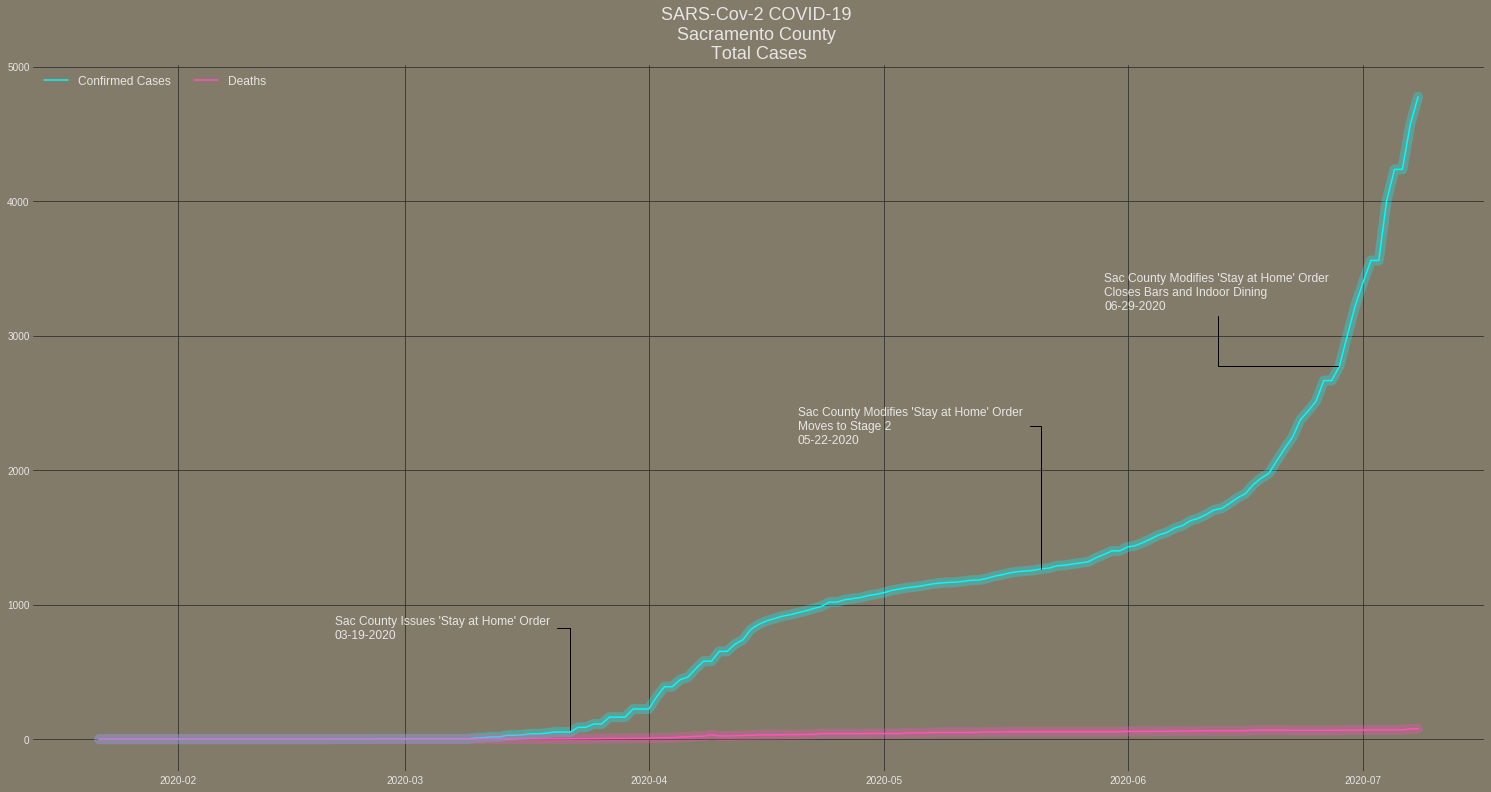

In [53]:
fig = plt.figure(figsize=(26,13))
ax = fig.add_subplot(1,1,1)

plt.style.use("seaborn-dark")
for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = colors[4]
for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'
ax.grid(color='#2e2e2e')
plt.title("SARS-Cov-2 COVID-19 \nSacramento County \nTotal Cases",
            fontsize=18) # suptitle
# plt.title('7-Day Moving Average', fontsize=12)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.annotate("Sac County Issues 'Stay at Home' Order \n03-19-2020",xy=(dates[60],50),arrowprops=dict(arrowstyle='-',connectionstyle='angle,angleA=0,angleB=90'),xytext=(dates[30],750), fontsize=12)
plt.annotate("Sac County Modifies 'Stay at Home' Order \nMoves to Stage 2 \n05-22-2020",xy=(dates[120],1250),arrowprops=dict(arrowstyle='-',connectionstyle='angle,angleA=0,angleB=90'),xytext=(dates[89],2200), fontsize=12)
plt.annotate("Sac County Modifies 'Stay at Home' Order \nCloses Bars and Indoor Dining \n06-29-2020",xy=(dates[158],2775),arrowprops=dict(arrowstyle='-',connectionstyle='angle,angleA=90,angleB=0'),xytext=(dates[128],3200), fontsize=12)
ax.plot(dates, 
        sac_conf.loc[:,'1/22/20':].squeeze(), 
        color=colors[0],
        label='Confirmed Cases'
       );
ax.plot(dates, 
        sac_death.loc[:,'1/22/20':].squeeze(),
        color=colors[1],
        label='Deaths'
       );
ax.plot(dates, 
        sac_conf.loc[:,'1/22/20':].squeeze(), 
        color=colors[0],
        lw=(diff_linewidth),
        alpha=alpha_value
       );
ax.plot(dates, 
        sac_death.loc[:,'1/22/20':].squeeze(), 
        color=colors[1],
        lw=(diff_linewidth),
        alpha=alpha_value
       );
ax.legend(fontsize=12, ncol=2, loc='upper left');
fig.savefig('SacCountyCases.png')